## IMMIGRATION TRENDS IN THE UNITED STATES

Ece Tanriverdi 

Link to my Github Webpage: ecetanriverdi.github.io/


In [380]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sb
from matplotlib.ticker import MaxNLocator


## Project Goals 


The team, **Ece Tanriverdi**, will be investigating data sets related to immigration trends in the United States. The project will focus on examining various demographic variables such as country of origin, rates of voluntary versus forced immigration, and settlement patterns across U.S. states. At this stage, I am considering a few data sets that provide comprehensive insights into immigration to the U.S. over the past decade(2013-2023). These data sets will be crucial in understanding the shifts in immigration patterns, especially in light of major global events like COVID-19.

The data I am using from Migration Policy Institue (MPI) state atractions is found here: https://public.tableau.com/app/profile/mpi.data.hub/viz/ACSimmigrantgroupsbystateandcounty_2018-22/Dashboard1

The data I am using from MPI about languages is found here: https://www.migrationpolicy.org/data/state-profiles/state/language/US//

The data I am using from MPI about Immigrantsis found here: https://www.migrationpolicy.org/programs/data-hub/charts/immigrant-population-over-time?width=1000&height=850&iframe=true

The data will be sourced from the Migration Policy Institute (MPI), which provides detailed statistics on state attractions, languages spoken at home, and immigrant populations. Using this data, I aim to explore several key questions, including:

- Which states are most popular for immigrant settlement, ranked by population size?
- How does the immigrant population compare to the overall U.S. population?
- What languages are most commonly spoken at home besides English?

**Initial Steps**  
My approach will begin with extracting, transforming, and loading (ETL) the data from MPI to ensure it is clean and ready for analysis. I will focus on identifying three to five key statistics that highlight interesting trends in immigration, such as:

- The top five states chosen by immigrants.
- Significant changes in immigration rates post-COVID-19.
- Any language shifts over the past decade.

A preliminary graph will be created to visualize the number of immigrants over time, which will provide a clearer picture of these trends and inform further analysis.

## Collaboration Plan

Since I am working on this project independently, I will maintain a consistent schedule to meet the project goals. I plan to set up weekly work sessions and will upload all relevant code and data analysis to a private GitHub repository. I will also use Jupyter Notebooks to document the ETL process and track progress. Any challenges or difficulties in formatting and tidying the data will be documented for review.

## IMMIGRANTS THEN AND NOW

I loaded a CSV file into a DataFrame, then dropped the first 19 rows to make it cleaner because I did not need the data before 2013 since I am only interested in the last decade. Finally, I displayed the first 10 rows of the modified DataFrame to inspect the data.

In [381]:
refugee = pd.read_csv("/Users/athleticsimage/Desktop/CMPS3160_FinalProject/CMPS3160_FinalProject/MPI-Data-Hub_Imm_N-Percent-US-Pop_2023.csv")
refugee = refugee.drop(range(0, 19))
refugee.head(10)

,Year,Number of Immigrants,Immigrants as a Percentage of the U.S. Population
19,2013,"41,348,100",13.10%
20,2014,"42,391,800",13.30%
21,2015,"43,290,400",13.50%
22,2016,"43,739,300",13.50%
23,2017,"44,525,900",13.70%
24,2018,"44,728,700",13.70%
25,2019,"44,932,900",13.70%
26,2021,"45,270,100",13.60%
27,2022,"46,182,200",13.90%
28,2023,"47,831,400",14.30%


I identified the year with the highest number of immigrants by using the `idxmax()` function on the "Number of Immigrants" column. This allowed me to retrieve the row corresponding to that year and view the details of the maximum immigrant count.

In [382]:
year_max_immigrants = refugee.loc[refugee['Number of Immigrants'].idxmax()]

year_max_immigrants


Year                                                       2023
Number of Immigrants                                 47,831,400
Immigrants as a Percentage of the U.S. Population        14.30%
Name: 28, dtype: object

I created a bar chart to visualize the number of immigrants by year, highlighting trends over time. From the chart, I observed a noticeable dip in immigrant numbers around 2020, which likely reflects the impact of the COVID-19 pandemic, as global movement was severely restricted during that period. Afterward, there was a gradual recovery, suggesting that immigration rates began to rise again as restrictions eased and international mobility resumed.

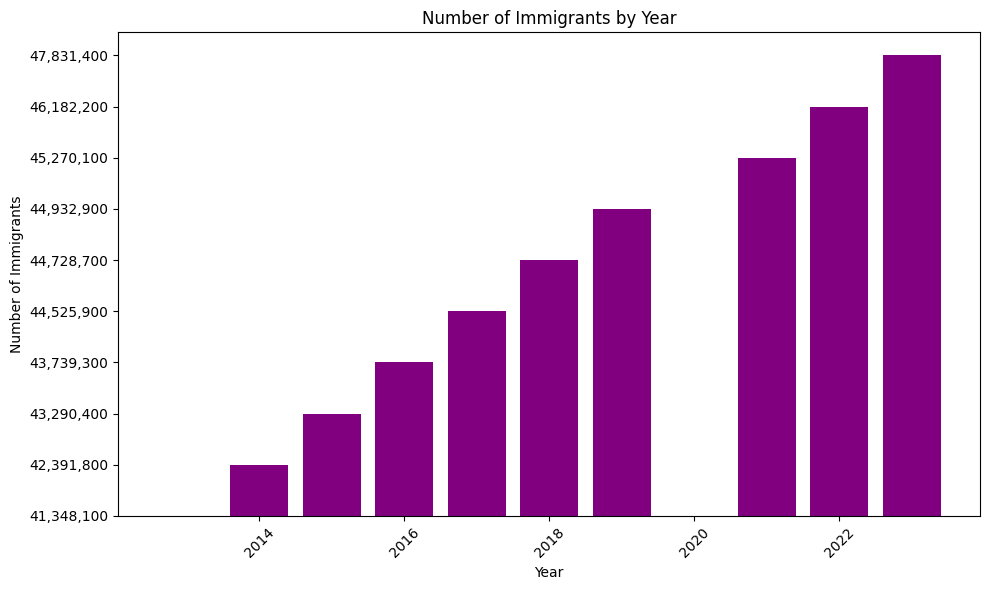

In [383]:
plt.figure(figsize=(10, 6))
plt.bar(refugee['Year'], refugee['Number of Immigrants'], color='purple')
plt.xlabel('Year')
plt.ylabel('Number of Immigrants')
plt.title('Number of Immigrants by Year')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## State Attraction Table

To check if there is a specific state immigrants tend to prefer, I started by using state abbreviations for better clarity when visualizing and plotting.

In [384]:
us_state_to_abbrev = {
    "Alabama": "AL",
    "Alaska": "AK",
    "Arizona": "AZ",
    "Arkansas": "AR",
    "California": "CA",
    "Colorado": "CO",
    "Connecticut": "CT",
    "Delaware": "DE",
    "Florida": "FL",
    "Georgia": "GA",
    "Hawaii": "HI",
    "Idaho": "ID",
    "Illinois": "IL",
    "Indiana": "IN",
    "Iowa": "IA",
    "Kansas": "KS",
    "Kentucky": "KY",
    "Louisiana": "LA",
    "Maine": "ME",
    "Maryland": "MD",
    "Massachusetts": "MA",
    "Michigan": "MI",
    "Minnesota": "MN",
    "Mississippi": "MS",
    "Missouri": "MO",
    "Montana": "MT",
    "Nebraska": "NE",
    "Nevada": "NV",
    "New Hampshire": "NH",
    "New Jersey": "NJ",
    "New Mexico": "NM",
    "New York": "NY",
    "North Carolina": "NC",
    "North Dakota": "ND",
    "Ohio": "OH",
    "Oklahoma": "OK",
    "Oregon": "OR",
    "Pennsylvania": "PA",
    "Rhode Island": "RI",
    "South Carolina": "SC",
    "South Dakota": "SD",
    "Tennessee": "TN",
    "Texas": "TX",
    "Utah": "UT",
    "Vermont": "VT",
    "Virginia": "VA",
    "Washington": "WA",
    "West Virginia": "WV",
    "Wisconsin": "WI",
    "Wyoming": "WY",
    "District of Columbia": "DC",
    "American Samoa": "AS",
    "Guam": "GU",
    "Northern Mariana Islands": "MP",
    "Puerto Rico": "PR",
    "United States Minor Outlying Islands": "UM",
    "Virgin Islands, U.S.": "VI",
}

I loaded a CSV file (state) into a DataFrame, and check if all the data types were as expected.

In [385]:
state = pd.read_csv("/Users/athleticsimage/Desktop/CMPS3160_FinalProject/CMPS3160_FinalProject/CMPS3160_FinalProject/HI.csv")
state.head(15)




,State,Round State N Imm,Round Total Imm Pop,State % by Origin
0,Alabama,"177,200","45,280,700",0.4%
1,Alaska,"58,100","45,280,700",0.1%
2,Arizona,"936,000","45,280,700",2.1%
3,Arkansas,"151,800","45,280,700",0.3%
4,California,"10,442,900","45,280,700",23.1%
5,Colorado,"547,600","45,280,700",1.2%
6,Connecticut,"543,000","45,280,700",1.2%
7,Delaware,"97,200","45,280,700",0.2%
8,District of Columbia,"90,100","45,280,700",0.2%
9,Florida,"4,574,300","45,280,700",10.1%


In [386]:
state.dtypes

State                  object
Round State N Imm      object
Round Total Imm Pop    object
State % by Origin      object
dtype: object

The data types were not as expected. I wanted `Round State N Imm`, `Round Total Imm Pop`, and `State % by Origin` to be floats for easier manipulation, so I converted their data types accordingly.

In [387]:
state['Round State N Imm'] = state['Round State N Imm'].astype(str).str.replace(',', '')
state['Round Total Imm Pop'] = state['Round Total Imm Pop'].astype(str).str.replace(',', '')

state['Round State N Imm'] = state['Round State N Imm'].astype(float)
state['Round Total Imm Pop'] = state['Round Total Imm Pop'].astype(float)

state['State % by Origin'] = state['State % by Origin'].astype(str).str.rstrip('%').astype(float) / 100

state.dtypes

State                   object
Round State N Imm      float64
Round Total Imm Pop    float64
State % by Origin      float64
dtype: object

 I'm focusing on the columns `State % by Origin`, `Round State N Imm`, and `Round Total Imm Pop` to get an overall view of the data's distribution. Using the `.describe()` method, I calculate important summary statistics like mean, standard deviation, and percentiles, which help me understand the spread and central tendencies of these variables. By printing the summary, I can quickly assess the characteristics of the data and spot any anomalies or trends.

In [388]:
summary_stats = state[['State % by Origin', 'Round State N Imm', 'Round Total Imm Pop']].describe()

print("Summary Statistics for the dataset:")
summary_stats

Summary Statistics for the dataset:


,State % by Origin,Round State N Imm,Round Total Imm Pop
count,51.000000,5.100000e+01,51.0
mean,0.019608,8.878627e+05,45280700.0
std,0.038900,1.759312e+06,0.0
min,0.000000,1.980000e+04,45280700.0
25%,0.002500,1.266500e+05,45280700.0
50%,0.006000,2.702000e+05,45280700.0
75%,0.020000,9.019500e+05,45280700.0
max,0.231000,1.044290e+07,45280700.0


I'm first cleaning the `Round State N Imm` column by removing any commas and converting the values to a float for easier analysis. Then, I sort the `state` DataFrame by the number of immigrants in descending order and select the top 10 states with the highest immigrant populations. Lastly, I create a horizontal bar chart to visualize the top 10 states, setting labels, title, and formatting the x-axis to display integer values while inverting the y-axis for a clearer presentation of the data.

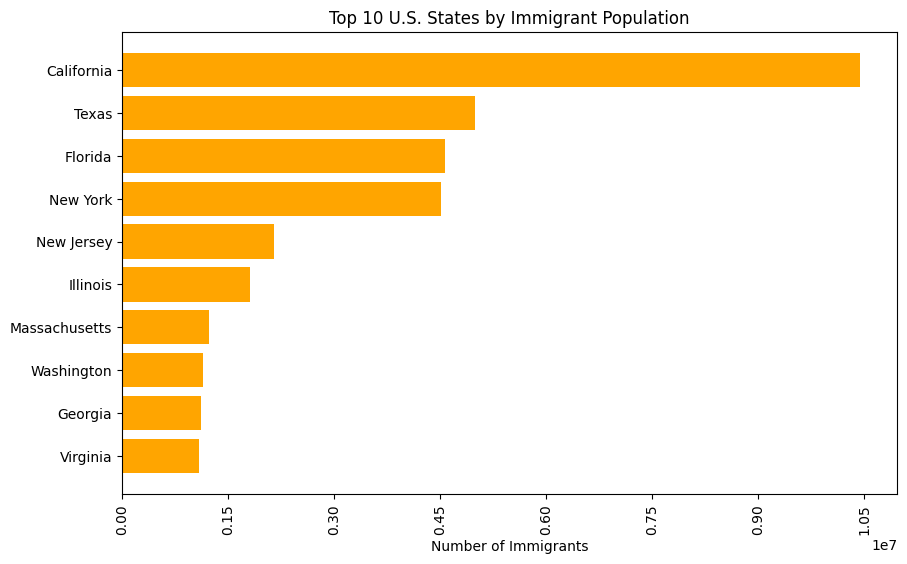

In [389]:
state['Round State N Imm'] = state['Round State N Imm'].astype(str).str.replace(',', '').astype(float)

top_10_state = state.sort_values(by="Round State N Imm", ascending=False).head(10)

plt.figure(figsize=(10, 6))
plt.barh(top_10_state["State"], top_10_state["Round State N Imm"], color='orange')
plt.xlabel('Number of Immigrants')
plt.xticks(rotation=90)
plt.title('Top 10 U.S. States by Immigrant Population')

plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True))
plt.gca().invert_yaxis()

plt.show()

I first cleaned the Round County # Immigrant column by removing commas and converting the values to floating-point numbers. I did this by using astype(str).str.replace(',', '').astype(float). Then, I sorted the data by the Round County # Immigrant column in descending order using sort_values() and selected the top 10 counties with the highest immigrant populations using head(10).

Next, I created a horizontal bar chart with a figure size of (10, 6) to visualize the top 10 counties by immigrant population. The x-axis represents the number of immigrants, and the y-axis represents the county names. I set the bars to be green in color for better visualization. I labeled the x-axis as "Number of Immigrants", rotated the x-axis labels by 90 degrees for readability, and added a title to the plot. I also ensured the x-axis displayed only integer values by using MaxNLocator(integer=True) and inverted the y-axis with plt.gca().invert_yaxis() to display the counties with the highest immigrant populations at the top. Finally, I displayed the plot using plt.show().

## LANGUAGES SPOKEN AT HOME

I loaded a CSV file into a pandas data frame called language using the pd.read_csv() function. The head(10) method then displayed the first 10 rows of the data frame, giving me a quick preview of the data to understand its structure. After that, I used  language.dtypes to check the data types of each column in the data frame, which helped me verify that the columns were properly formatted (e.g., numbers were stored as integers or floats, and text as strings) before performing any analysis or operations.

In [390]:
language = pd.read_csv("/Users/athleticsimage/Desktop/CMPS3160_FinalProject/CMPS3160_FinalProject/CMPS3160_FinalProject/language by state.csv")
language.head(10)


,State,Most Spoken Language (Besides English and Spanish)
0,Alaska,Aleut languages
1,Alabama,German
2,Arkansas,German
3,Arizona,Navajo
4,California,Chinese
5,Colorado,German
6,Connecticut,Portuguese
7,District of Columbia,French
8,Delaware,Chinese
9,Florida,Haitian Creole


In [391]:
language.dtypes

State                                                 object
Most Spoken Language (Besides English and Spanish)    object
dtype: object

Here, I aim to analyze the most spoken languages in the U.S. states, excluding English and Spanish since I assume pretty much a lot of people can speak Spanish as a second language. By grouping the data based on the "Most Spoken Language (Besides English and Spanish)" column, I count how many states have each language as the most spoken. I then reset the index and rename the columns to provide a clearer overview, resulting in a new DataFrame that shows the language and the number of states where it is the most spoken. This allows for a better understanding of the distribution of non-English, non-Spanish languages across the states.

In [392]:
language_counts = language.groupby("Most Spoken Language (Besides English and Spanish)")["State"].size()

languagedf = language_counts.reset_index()
languagedf.columns = ["Language", "Number of States"]

languagedf

,Language,Number of States
0,Aleut languages,1
1,Arabic,4
2,Chinese,6
3,Dakota languages,1
4,French,8
5,German,13
6,Haitian Creole,1
7,Hmong,1
8,Japanese,1
9,Korean,2


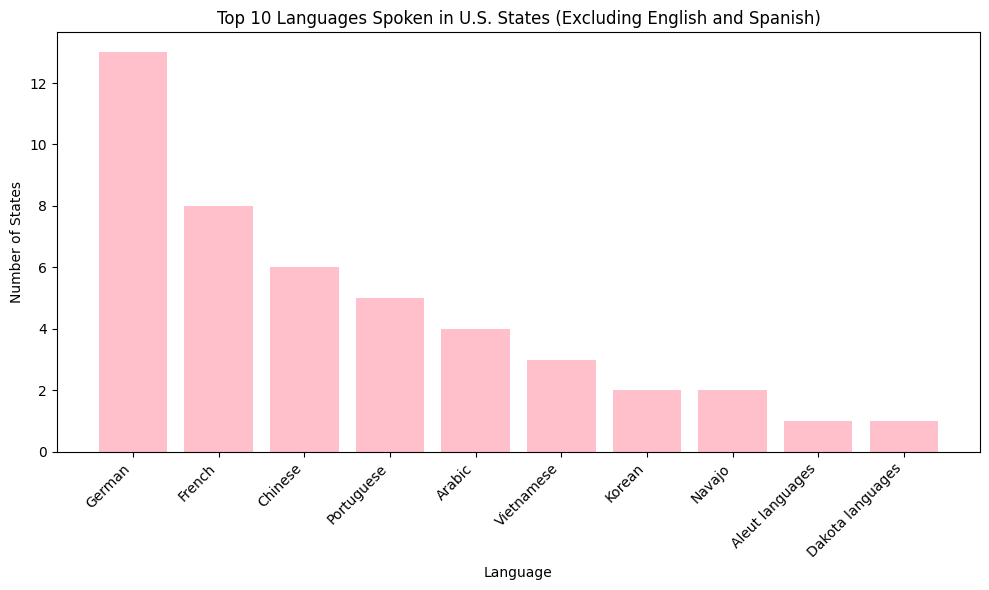

In [393]:

grouped_df = pd.DataFrame(languagedf)

top_10 = grouped_df.sort_values("Number of States", ascending=False).head(10)

plt.figure(figsize=(10, 6))
plt.bar(top_10["Language"], top_10["Number of States"], color="pink")
plt.xticks(rotation=45, ha="right")
plt.xlabel("Language")
plt.ylabel("Number of States")
plt.title("Top 10 Languages Spoken in U.S. States (Excluding English and Spanish)")
plt.tight_layout()
plt.show()


Here I can see that German is the most spoken language other than English and Spanish followed by French.

## Model Plan

Using datasets on language spoken at home and immigration trends across U.S. states, I aim to analyze how language distributions have changed over time and predict future trends. Specifically, I will examine the evolution of the most spoken languages within each state and forecast which languages are likely to dominate in the coming years. By analyzing data on the number of people speaking languages other than English, I will explore regional language diversity and identify which states will experience significant linguistic shifts. Additionally, I will focus on immigration patterns, particularly trends in asylum seekers and refugees, to understand how the number of immigrants from specific countries has evolved and predict future immigration flows.

The analysis will begin by identifying historical trends and applying time series forecasting and regression models to predict future language and immigration patterns. By analyzing growth rates and changes over time, I will make data-driven predictions about language diversity and immigration trends in different states. The models will be validated using metrics like RMSE and MAE, and I will highlight states that are likely to see the most significant changes in both language populations and immigrant numbers. This research will provide insights into the future linguistic and demographic shifts across the U.S., offering valuable information about potential social and cultural changes.

Here, my the goal is to merge two datasets, `state` and `language`, based on the common column `'State'`. The `pd.merge()` function is used to combine the two DataFrames, and the `on='State'` parameter specifies that the merge should occur using the `State` column. The `how='inner'` argument ensures that only the rows where there is a matching `State` in both datasets are kept, resulting in a merged DataFrame (`merged_state`) that contains information from both the `state` and `language` datasets, filtered to include only the states present in both.

In [394]:
merged_state = pd.merge(state, language, on='State', how='inner')
merged_state

,State,Round State N Imm,Round Total Imm Pop,State % by Origin,Most Spoken Language (Besides English and Spanish)
0,Alabama,177200.0,45280700.0,0.004,German
1,Alaska,58100.0,45280700.0,0.001,Aleut languages
2,Arizona,936000.0,45280700.0,0.021,Navajo
3,Arkansas,151800.0,45280700.0,0.003,German
4,California,10442900.0,45280700.0,0.231,Chinese
5,Colorado,547600.0,45280700.0,0.012,German
6,Connecticut,543000.0,45280700.0,0.012,Portuguese
7,Delaware,97200.0,45280700.0,0.002,Chinese
8,District of Columbia,90100.0,45280700.0,0.002,French
9,Florida,4574300.0,45280700.0,0.101,Haitian Creole


The `set_index("State", inplace=True)` method is used to set the "State" column as the index of the `merged_state` DataFrame. By doing this, the "State" column is moved from a regular column to the index, making it easier to access and work with data related to specific states. The `inplace=True` argument ensures that the change is applied directly to the `merged_state` DataFrame without creating a new one. After this operation, the DataFrame will be indexed by states, which can simplify data access and operations based on the state.

In [395]:
merged_state.set_index("State", inplace=True)
merged_state

,Round State N Imm,Round Total Imm Pop,State % by Origin,Most Spoken Language (Besides English and Spanish)
State,,,,
Alabama,177200.0,45280700.0,0.004,German
Alaska,58100.0,45280700.0,0.001,Aleut languages
Arizona,936000.0,45280700.0,0.021,Navajo
Arkansas,151800.0,45280700.0,0.003,German
California,10442900.0,45280700.0,0.231,Chinese
Colorado,547600.0,45280700.0,0.012,German
Connecticut,543000.0,45280700.0,0.012,Portuguese
Delaware,97200.0,45280700.0,0.002,Chinese
District of Columbia,90100.0,45280700.0,0.002,French


In this code, the `map()` function is applied to the index of the `merged_state` DataFrame to replace the full state names with their corresponding state abbreviations. The `us_state_to_abbrev` variable likely contains a dictionary that maps each U.S. state name to its two-letter abbreviation. By using `merged_state.index.map(us_state_to_abbrev)`, the index values (which represent the states) are transformed into their abbreviations. The `head(10)` method is then used to display the first 10 rows of the updated `merged_state` DataFrame, showing the states now represented by their abbreviations.

In [396]:
merged_state.index = merged_state.index.map(us_state_to_abbrev)
merged_state

,Round State N Imm,Round Total Imm Pop,State % by Origin,Most Spoken Language (Besides English and Spanish)
State,,,,
AL,177200.0,45280700.0,0.004,German
AK,58100.0,45280700.0,0.001,Aleut languages
AZ,936000.0,45280700.0,0.021,Navajo
AR,151800.0,45280700.0,0.003,German
CA,10442900.0,45280700.0,0.231,Chinese
CO,547600.0,45280700.0,0.012,German
CT,543000.0,45280700.0,0.012,Portuguese
DE,97200.0,45280700.0,0.002,Chinese
DC,90100.0,45280700.0,0.002,French


**CONCLUTION**

This table provides a snapshot of the distribution of immigrant populations across different U.S. states, along with the most commonly spoken languages (besides English and Spanish) in those states. It shows the number of immigrants in each state, the percentage of the state's population represented by immigrants, and the most spoken languages among immigrant communities. For instance, states like California have a significant immigrant population, with languages such as Chinese and Spanish being prominent, while states like Alaska and Alabama have smaller immigrant populations with languages such as Aleut and German. 

The analysis reveals important trends in immigration, such as the prominence of languages like German, Chinese, Portuguese, and French, which are spoken by sizable immigrant populations across multiple states. The findings suggest that certain languages dominate in specific regions of the U.S., while others remain more localized, reflecting broader trends in immigration patterns. Over the coming years, it will be important to monitor how these language distributions evolve, especially as migration trends shift due to political, economic, and social factors. This data can inform future policy decisions related to language support, education, and integration efforts across states. 

(Article citation: Migration Policy Institute. "Frequently Requested Statistics on Immigrants and Immigration in the United States." [Migration Policy Institute](https://www.migrationpolicy.org/article/frequently-requested-statistics-immigrants-and-immigration-united-states).)

## Linear Regression

I use `LinearRegression` to create a model that establishes the relationship between the variables by fitting a linear equation to the data. I then use `train_test_split` to divide the data into training and testing sets, which allows me to evaluate the model's performance. Additionally, I apply `cross_val_predict` to perform cross-validation, which helps assess how well the model generalizes by predicting outcomes across multiple data subsets.

In [397]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_predict


I cleaned the data by first removing commas from the "Number of Immigrants" column using `str.replace(',', '')` and then converting it into a float type with `astype(float)`. This allows me to work with numerical values instead of strings. For the "Immigrants as a Percentage of the U.S. Population" column, I removed the percentage signs using `str.rstrip('%')`, then converted the values to floats and divided by 100 to express the percentages as decimals. Finally, I checked the data types of all the columns using `refugee.dtypes` to confirm that the necessary columns were properly converted to numeric types, ensuring the data is ready for analysis.

In [398]:
refugee['Number of Immigrants'] = refugee['Number of Immigrants'].astype(str).str.replace(',', '')

refugee['Number of Immigrants'] = refugee['Number of Immigrants'].astype(float)

refugee['Immigrants as a Percentage of the U.S. Population'] = refugee['Immigrants as a Percentage of the U.S. Population'].astype(str).str.rstrip('%').astype(float) / 100

refugee.dtypes


Year                                                   int64
Number of Immigrants                                 float64
Immigrants as a Percentage of the U.S. Population    float64
dtype: object

I selected the relevant columns for my analysis by choosing the first two columns, which I stored in `features`, and the third column as the prediction target (`pred_feat`). I then created feature (`X`) and target (`y`) datasets by extracting the corresponding columns from the `refugee` DataFrame. To prepare the data for modeling, I split the dataset into training and testing sets using `train_test_split`, allocating 40% of the data to the test set and the remaining 60% to the training set, ensuring I could evaluate the model's performance later.

In [399]:
features = refugee.columns[[0,1]]
pred_feat = refugee.columns[2]

X = refugee[features]
y = refugee[pred_feat]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)

I initialized a linear regression model using `LinearRegression()` and trained it by fitting the model to the training data (`X_train` and `y_train`). After training the model, I used it to make predictions on the test data (`X_test`), storing the predicted values in `y_pred`. This allowed me to assess how well the model generalizes to new, unseen data.

In [400]:
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [401]:
X_test


,Year,Number of Immigrants
21,2015,43290400.0
28,2023,47831400.0
20,2014,42391800.0
22,2016,43739300.0


In [402]:
y_pred

array([0.13501637, 0.14248526, 0.1331342 , 0.13560972])

In this step, I calculate three evaluation metrics to assess the performance of the linear regression model: Mean Absolute Error (MAE), Mean Squared Error (MSE), and Root Mean Squared Error (RMSE). MAE provides the average magnitude of errors in predictions, without considering their direction. MSE gives the average squared difference between predicted and actual values, emphasizing larger errors more. RMSE is the square root of MSE and represents the error in the same units as the original data, offering a clearer interpretation of model performance. By comparing these values, I can understand how well the model is making predictions.

In [403]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,root_mean_squared_error
 
mae = mean_absolute_error(y_true=y_test,y_pred=y_pred)
# squared=True returns MSE value, False returns RMSE value. 
mse = mean_squared_error(y_true=y_test,y_pred=y_pred) #default=True
rmse =root_mean_squared_error(y_true=y_test,y_pred=y_pred)

print("MAE:",mae)
print("MSE:",mse)
print("RMSE:",rmse)

MAE: 0.00031875719398288815
MSE: 1.6374865998028632e-07
RMSE: 0.00040465869566869107


In this step, I create a new dataset to forecast the number of immigrants in the U.S. for the years 2024 through 2030, based on the information from the article "Foreign-Born Population in the U.S." from the U.S. Census Bureau. According to the article, the immigrant population increased by 15.6% between 2010 and 2022, which corresponds to an average annual increase of 1.3%. Using this growth rate, I calculate the projected number of immigrants for the next seven years, from 2024 to 2030. I store these values in a new DataFrame, which will allow for further analysis and comparison with the actual population data as it becomes available.

Article citation: https://www.census.gov/newsroom/press-releases/2024/foreign-born-population.html

In [404]:
future_years = {'Year': ['2024', '2025', '2026','2027', '2028', '2029','2030'], 'Number of Immigrants': [48453208.2,49083099.9,49721180.2,50367555.5,51022333.8,51685624.1,52357537.2]}
future_year_df = pd.DataFrame(future_years)
future_year_df


,Year,Number of Immigrants
0,2024,48453208.2
1,2025,49083099.9
2,2026,49721180.2
3,2027,50367555.5
4,2028,51022333.8
5,2029,51685624.1
6,2030,52357537.2


In this step, I use the linear regression model I previously trained to predict the number of immigrants for the years 2024 through 2030 based on the new dataset, `future_year_df`. The model uses the features from the original training data to make predictions for these future years. After applying the model to the new data, the predicted values are stored in the variable `future_pred`, which represents the estimated number of immigrants for each year. These predictions will help assess the accuracy and consistency of the model's projections over time.

In [405]:
future_pred = model.predict(future_year_df)
future_pred




array([0.14357416, 0.14468622, 0.14582175, 0.14698106, 0.14816444,
       0.14937223, 0.15060472])

In this step, I create a new DataFrame `df_future_pred` to store the predicted values for the "Immigrants as a Percentage of the U.S. Population" for the years 2024 to 2030. The values are represented in the `future_pred` list, which contains the predicted percentages of immigrants in the U.S. population for each of the future years. By using these predictions, I can analyze the future trends of the immigrant population as a proportion of the total U.S. population. The result is stored in a DataFrame with the column name 'Immigrants as a Percentage of the U.S. Population'.

In [406]:
future_pred = [0.14381993, 0.14497503, 0.14615609, 0.14736345, 0.14859745,
               0.14985844, 0.15114677]

df_future_pred = pd.DataFrame(future_pred, columns=['Immigrants as a Percentage of the U.S. Population'])

df_future_pred


,Immigrants as a Percentage of the U.S. Population
0,0.143820
1,0.144975
2,0.146156
3,0.147363
4,0.148597
5,0.149858
6,0.151147


 I combine the predicted values for the "Immigrants as a Percentage of the U.S. Population" with the corresponding years and the number of immigrants for each year from the `future_year_df`. I add two new columns to `df_future_pred` — "Year" and "Number of Immigrants" — using the data from `future_year_df`. Then, I rearrange the columns to ensure the final DataFrame contains "Year," "Number of Immigrants," and "Immigrants as a Percentage of the U.S. Population" in that specific order. This gives a comprehensive view of the projected data for the years 2024 to 2030, including both the immigrant population numbers and the percentage they represent in the U.S. population.

In [407]:
df_future_pred = pd.DataFrame(future_pred, columns=['Immigrants as a Percentage of the U.S. Population'])

df_future_pred['Year'] = future_year_df['Year']
df_future_pred['Number of Immigrants'] = future_year_df['Number of Immigrants']

df_future_pred = df_future_pred[['Year', 'Number of Immigrants', 'Immigrants as a Percentage of the U.S. Population']]

df_future_pred

,Year,Number of Immigrants,Immigrants as a Percentage of the U.S. Population
0,2024,48453208.2,0.143820
1,2025,49083099.9,0.144975
2,2026,49721180.2,0.146156
3,2027,50367555.5,0.147363
4,2028,51022333.8,0.148597
5,2029,51685624.1,0.149858
6,2030,52357537.2,0.151147


Here,I combined the original dataset, `refugee`, with the projected immigrant data for the years 2024 to 2030 into a new DataFrame, `df_combined`. After converting the "Year" column to integers, I created a dual-axis plot using `matplotlib`. The first axis (ax1) displays a bar chart showing the number of immigrants for the years 2013–2023 and 2024–2030, with different colors representing the two periods. The second axis (ax2) overlays a line graph representing the percentage of immigrants in the U.S. population across the same time span. I customized the plot by labeling the axes, formatting the x-axis to display years as integers, and adding legends to differentiate the two datasets. This visual allows for a clear comparison of the immigrant population trends and their percentage of the U.S. population over time, illustrating both historical data and future projections.

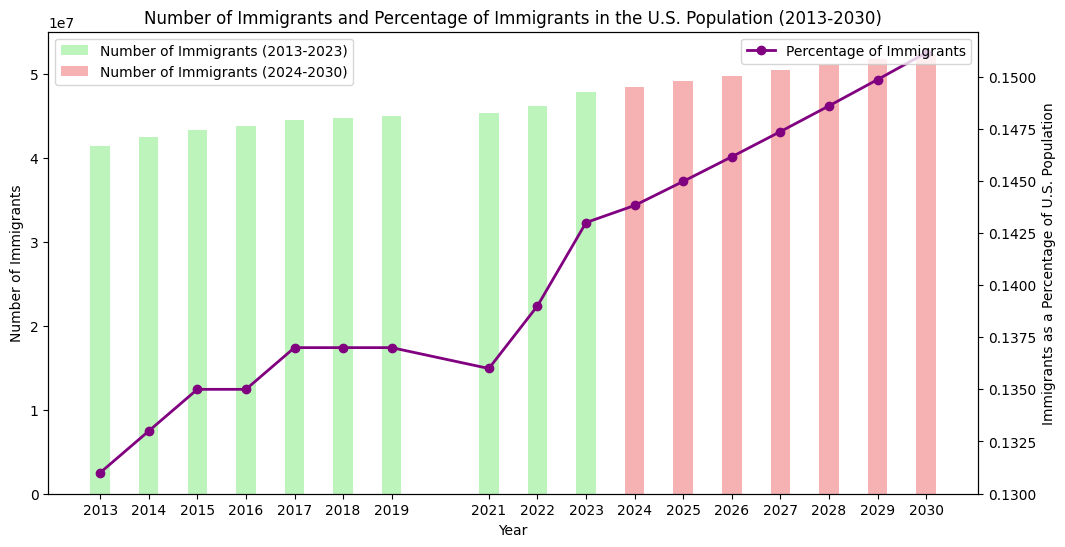

In [408]:

df_combined = pd.concat([refugee, df_future_pred], ignore_index=True)

df_combined['Year'] = df_combined['Year'].astype(int)

fig, ax1 = plt.subplots(figsize=(12, 6))

years_2013_2023 = df_combined[df_combined['Year'] <= 2023]
years_2024_2030 = df_combined[df_combined['Year'] > 2023]

ax1.bar(years_2013_2023['Year'], years_2013_2023['Number of Immigrants'], 
        color='lightgreen', label='Number of Immigrants (2013-2023)', alpha=0.6, width=0.4)

ax1.bar(years_2024_2030['Year'], years_2024_2030['Number of Immigrants'], 
        color='lightcoral', label='Number of Immigrants (2024-2030)', alpha=0.6, width=0.4)

ax2 = ax1.twinx()
ax2.plot(df_combined['Year'], df_combined['Immigrants as a Percentage of the U.S. Population'],
         color='purple', label='Percentage of Immigrants', marker='o', linestyle='-', linewidth=2)

ax1.set_xlabel('Year')
ax1.set_ylabel('Number of Immigrants')
ax2.set_ylabel('Immigrants as a Percentage of U.S. Population')

plt.title('Number of Immigrants and Percentage of Immigrants in the U.S. Population (2013-2030)')

ax1.set_xticks(df_combined['Year'])
ax1.get_xaxis().set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x)}'))

ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.show()



**CONCLUTON**

Based on the data and the projections from 2024 to 2030, it can be concluded that the number of immigrants in the U.S. will continue to increase steadily over the next several years, with an average yearly increase of approximately 1.3%. The immigrants' percentage of the total U.S. population will also rise gradually, from 0.1438% in 2024 to 0.1511% in 2030. This indicates a continued growth in the immigrant population, reflecting both the increasing number of immigrants and their growing share of the overall population. These trends are aligned with the broader demographic shifts, as the immigrant population continues to play a more significant role in shaping the U.S. demographic landscape.